
# Project: Investigate a Dataset - Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>



## Inspiration:
> **Key Questions**: What if that possible to predict someone to no-show an appointment? What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?




In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('/Users/joanna/Kaggle/Kaggle_MedicalAppoimentData.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


`From the information as above mentioned, it has no missing value in the dataset, because all the attributes
 have 110,527 instances. `
 
`Things to be revised:
 The types of PatientID and AppointmentID are "float" and "integer" respectively, yet it should be used as ths 
 string type in the following analysis. So it needs to transform the types.
 The data type of time, including ScheduledDay and AppointmentDay, should be transformed into datetime type.`

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


`Things to be revised:
 The minimum of age is -1.0, which does not make sense.
 The handcap has the maximum 4, which is supposed to be 1 since it's categorical data.`



### Data Cleaning

In [5]:
#convert the type of PatientID from float to string
df['PatientId'] = df['PatientId'].apply(lambda x : str(int(x)))

In [6]:
df['PatientId'].head(3)

0     29872499824296
1    558997776694438
2      4262962299951
Name: PatientId, dtype: object

In [7]:
df['PatientId'].nunique()

62299

In [8]:
#convert the type of PatientID from int to string
df['AppointmentID'] = df['AppointmentID'].apply(lambda x : str(int(x)))
df['AppointmentID'].head(3)

0    5642903
1    5642503
2    5642549
Name: AppointmentID, dtype: object

In [9]:
df['AppointmentID'].nunique()

110527

In [10]:
#age should be positive integers, convert the age with negative value
df[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


`There is only one instance, so just remove this one.`

In [11]:
df.drop(99832, inplace = True)

In [12]:
df[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [13]:
#the value of handcap should only be 0 or 1, convert those who are more than 1
len(df[df['Handcap'] > 1])

199

In [14]:
df['Handcap'] = np.where(df['Handcap'] > 0, 1, 0)

In [15]:
len(df[df['Handcap'] > 1])

0

In [16]:
#rename inconsistent and typo columns
df = df.rename(index = str, columns = {'PatientId': 'PatientID', 'Handcap': 'Handicap' ,'No-show': 'No_show'})
df.head(1)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [17]:
#convert date information from string to datetime type
from datetime import datetime as dt

In [18]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [19]:
df['ScheduledDay'].dtypes, df['AppointmentDay'].dtypes

(dtype('<M8[ns]'), dtype('<M8[ns]'))

In [20]:
df.head(1)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [21]:
#the format of ScheduledDay and AppointmentDay is different, so split ScheduledDay into day and time
df['SchduledTime'] = df['ScheduledDay'].dt.time
df['ScheduledDay'] = df['ScheduledDay'].dt.normalize()

In [22]:
SchduledTime = df['SchduledTime'] 
df.drop(labels=['SchduledTime'], axis = 1, inplace = True)
df.insert(4, 'SchduledTime', SchduledTime)

In [23]:
df.head(1)

,PatientID,AppointmentID,Gender,ScheduledDay,SchduledTime,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29,18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [24]:
#calculate waiting day and create a new column
df['WaitingDay'] = df['AppointmentDay'] - df['ScheduledDay']
df.head(10)

,PatientID,AppointmentID,Gender,ScheduledDay,SchduledTime,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitingDay
0,29872499824296,5642903,F,2016-04-29,18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
1,558997776694438,5642503,M,2016-04-29,16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days
2,4262962299951,5642549,F,2016-04-29,16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days
3,867951213174,5642828,F,2016-04-29,17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days
4,8841186448183,5642494,F,2016-04-29,16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days
5,95985133231274,5626772,F,2016-04-27,08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,2 days
6,733688164476661,5630279,F,2016-04-27,15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2 days
7,3449833394123,5630575,F,2016-04-27,15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2 days
8,56394729949972,5638447,F,2016-04-29,08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,0 days
9,78124564369297,5629123,F,2016-04-27,12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,2 days


In [25]:
df['WaitingDay'] = df['WaitingDay'].dt.days

In [26]:
df.sort_values(by = 'WaitingDay', ascending = True).head()

,PatientID,AppointmentID,Gender,ScheduledDay,SchduledTime,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitingDay
71533,998231581612122,5686628,F,2016-05-11,13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3787481966821,5655637,M,2016-05-04,06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1
64175,24252258389979,5664962,F,2016-05-05,13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
55226,7896293967868,5715660,F,2016-05-18,14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
27033,7839272661752,5679978,M,2016-05-10,10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1


In [27]:
df.query('WaitingDay < 0').WaitingDay

27033   -1
55226   -1
64175   -1
71533   -6
72362   -1
Name: WaitingDay, dtype: int64

`It is fonud that there are 5 instances of waiting day with negative values, which does not make sense, so they should be removed.`

In [28]:
df.drop(df.query('WaitingDay < 0').WaitingDay.index, inplace = True)

In [29]:
df.query('WaitingDay < 0').WaitingDay.count()

0

In [30]:
wt_days = df.groupby(['WaitingDay','No_show'])
wt_days_1 = wt_days.count()['PatientID'].unstack()

In [31]:
wt_days_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 179
Data columns (total 2 columns):
No     124 non-null float64
Yes    111 non-null float64
dtypes: float64(2)
memory usage: 3.0 KB


In [32]:
wt_days_1.fillna(value = 0, inplace=True)

In [33]:
wt_days_1.reset_index(drop = False, inplace = True)
wt_days_1.head()

No_show,WaitingDay,No,Yes
0,0,36770.0,1792.0
1,1,4100.0,1113.0
2,2,5123.0,1602.0
3,3,2093.0,644.0
4,4,4059.0,1231.0


In [34]:
wt_days_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 3 columns):
WaitingDay    129 non-null int64
No            129 non-null float64
Yes           129 non-null float64
dtypes: float64(2), int64(1)
memory usage: 3.1 KB


In [35]:
#categorize waiting day
categories = pd.Series(['Same day: 0', 'Within a Week: 1-3', 'Week: 4-7', 
                        'Fortnight: 8-15', 'Month: 16-30', 'Quarter: 31-90', 
                        'Semester: 91-180', 'Over 1/2 Year: >180'])

In [36]:
bins = [-1,0,3,7,15,30,90,180,10000]
wt_days_1['WaitingCategories'] = pd.cut(wt_days_1.WaitingDay, bins, labels = categories)

In [37]:
wt_days_1.head()

No_show,WaitingDay,No,Yes,WaitingCategories
0,0,36770.0,1792.0,Same day: 0
1,1,4100.0,1113.0,Within a Week: 1-3
2,2,5123.0,1602.0,Within a Week: 1-3
3,3,2093.0,644.0,Within a Week: 1-3
4,4,4059.0,1231.0,Week: 4-7


In [38]:
df['WaitingCategories'] = pd.cut(df.WaitingDay, bins, labels = categories)
WaitingCategories = df['WaitingCategories']
df.drop(labels=['WaitingCategories'], axis = 1, inplace = True)
df.insert(6, 'WaitingCategories', WaitingCategories)


WaitingDay = df['WaitingDay']
df.drop(labels=['WaitingDay'], axis = 1, inplace = True)
df.insert(6, 'WaitingDay', WaitingDay)
df.head(2)

,PatientID,AppointmentID,Gender,ScheduledDay,SchduledTime,AppointmentDay,WaitingDay,WaitingCategories,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29,18:38:08,2016-04-29,0,Same day: 0,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,16:08:27,2016-04-29,0,Same day: 0,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [509]:
#categorize age
segments = pd.Series(['Children: 0-14', 'Teenager: 15-29', 'Adult: 30-44', 'Older Adult: 45-59', 'Senior: 60-74', 'Very Old: >75'])
bins = [0,15,30,45,60,75,10000]
df['AgeStructure'] = pd.cut(df.Age, bins, labels = segments)
AgeStructure = df['AgeStructure'] 
df.drop(labels=['AgeStructure'], axis = 1, inplace = True)
df.insert(8, 'AgeStructure', AgeStructure)
df.head(2)

,PatientID,AppointmentID,Gender,ScheduledDay,SchduledTime,AppointmentDay,WaitingDay,WaitingCategories,AgeStructure,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29,18:38:08,2016-04-29,0,Same day: 0,Senior: 60-74,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,16:08:27,2016-04-29,0,Same day: 0,Older Adult: 45-59,56,JARDIM DA PENHA,0,0,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### What factors affect whether a patient show up for their scheduled appointment?

>**From the aspect of patients' profile**

In [777]:
#define functions which is going to be used below
def getNoShowlist1(data):
    '''
    get the table shown the relationship between certain factor and no_show class
    calculate showing rate: the rate of those who did come to the appointment among those who made schedule
    '''
    n1 = df.groupby([data, 'No_show'])
    n2 = n1.count()['PatientID'].sort_index().unstack().reset_index()
    n2['No-Showing Rate'] = (n2.Yes / (n2.No + n2.Yes))*100

    return n2

In [778]:
def getNoShowlist2(data):
    '''
    add one more factor "AgeStructure" into no-show list 
    '''
    n1 = df.groupby(['AgeStructure', data, 'No_show'])
    n2 = n1.count()['PatientID'].sort_index().unstack().reset_index()
    n2['No-Showing Rate'] = (n2.Yes / (n2.No + n2.Yes))*100

    return n2

### How many people did come to the treatment? What is the percentage?

In [779]:
df['No_show'].value_counts()

No     88207
Yes    22314
Name: No_show, dtype: int64

In [780]:
round(88207/110521*100, 2)

79.81

***Quick Note***

`In overall, there are 79.8% people who scheduled did show. Among 110,521 people, 88,207 ppl did show up.`

### Do people with different gender have different appointment rate?

**Gender vs. No_Show**

In [781]:
df['Gender'].value_counts()

F    71836
M    38685
Name: Gender, dtype: int64

In [782]:
gender = getNoShowlist1(df['Gender'])
gender

No_show,Gender,No,Yes,No-Showing Rate
0,F,57245,14591,20.311543
1,M,30962,7723,19.963810


In [783]:
gender.describe()

No_show,No,Yes,No-Showing Rate
count,2.00000,2.000000,2.000000
mean,44103.50000,11157.000000,20.137677
std,18584.88753,4856.409373,0.245884
min,30962.00000,7723.000000,19.963810
25%,37532.75000,9440.000000,20.050743
50%,44103.50000,11157.000000,20.137677
75%,50674.25000,12874.000000,20.224610
max,57245.00000,14591.000000,20.311543


***Quick Note:*** 

`There are more female than male, yet both female and male has around 20% no-showing rate, which means that 20 ppl out of 100 didn't go to the appointment, namely, 80 ppl did go the appointments.`

### Do people at different age have different showing rate?

**Age vs. No_Show**

In [784]:
df['Age'].describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

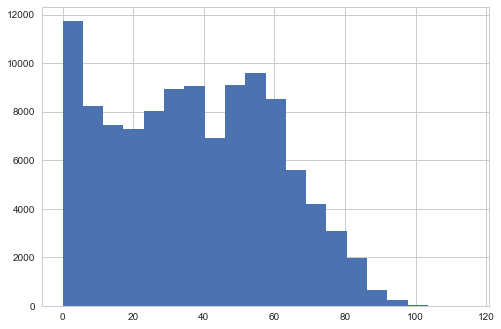

In [785]:
plt.hist(df['Age'], bins = 20);

`*Not a normal distribution.`

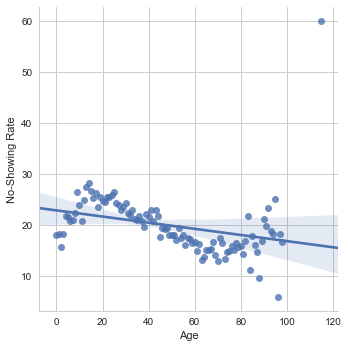

In [787]:
a = getNoShowlist1(df['Age'])
sns.lmplot(x='Age', y='No-Showing Rate', data = a, fit_reg = True);

In [788]:
Age = getNoShowlist1(df['AgeStructure'])
Age['Total'] = Age['No'] + Age['Yes']
Age.sort_values(by = 'Total', ascending = False)

No_show,AgeStructure,No,Yes,No-Showing Rate,Total
2,Older Adult: 45-59,19048,4131,17.822167,23179
0,Adult: 30-44,17262,4691,21.368378,21953
4,Teenager: 15-29,15921,5240,24.762535,21161
1,Children: 0-14,16320,4608,22.018349,20928
3,Senior: 60-74,12234,2136,14.864301,14370
5,Very Old: >75,4522,869,16.119458,5391


In [789]:
gender_age = getNoShowlist2(df['Gender'])
gender_age

No_show,AgeStructure,Gender,No,Yes,No-Showing Rate
0,Adult: 30-44,F,12099,3284,21.348242
1,Adult: 30-44,M,5163,1407,21.415525
2,Children: 0-14,F,7968,2273,22.195098
3,Children: 0-14,M,8352,2335,21.848975
4,Older Adult: 45-59,F,12983,2828,17.886282
5,Older Adult: 45-59,M,6065,1303,17.684582
6,Senior: 60-74,F,8143,1490,15.467663
7,Senior: 60-74,M,4091,646,13.637323
8,Teenager: 15-29,F,11595,3812,24.742000
9,Teenager: 15-29,M,4326,1428,24.817518


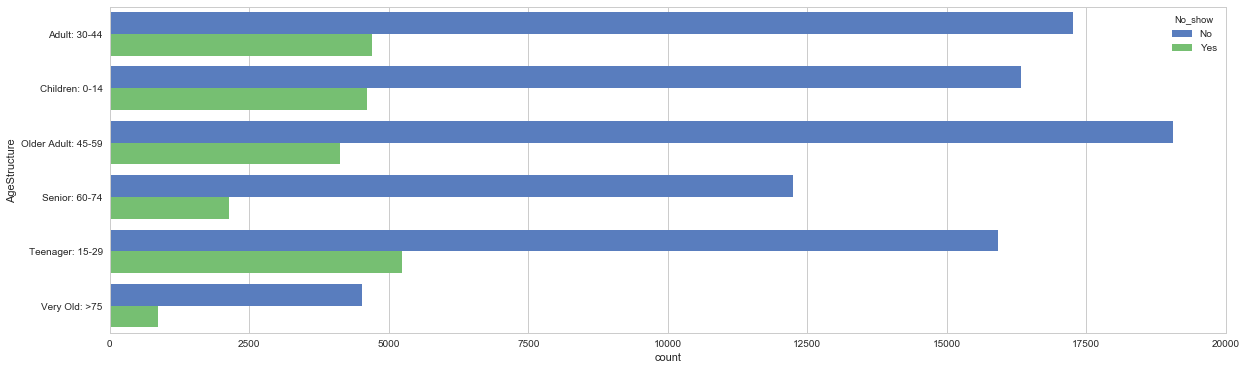

In [790]:
plt.figure(figsize = (20,6))
sns.countplot(y = 'AgeStructure', hue = 'No_show', data = df, palette = 'muted');

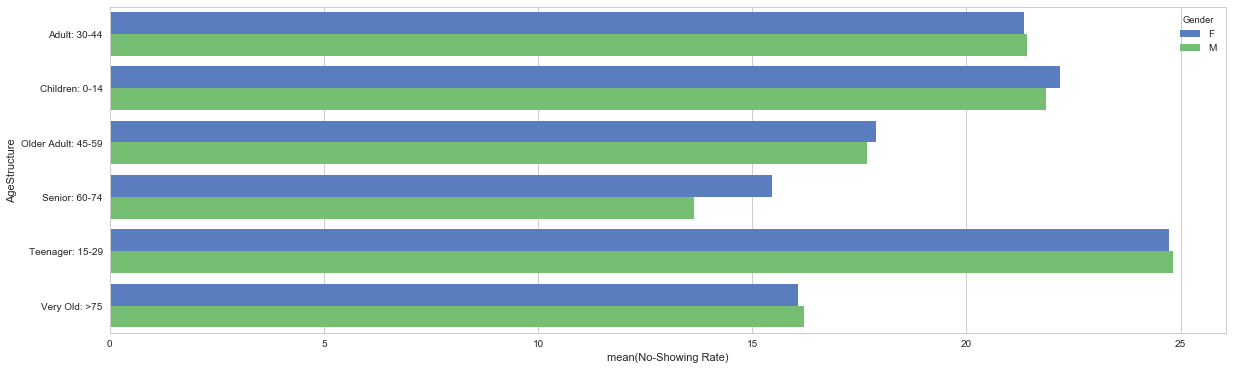

In [792]:
plt.figure(figsize = (20,6))
sns.barplot('No-Showing Rate', 'AgeStructure', hue = 'Gender', data = gender_age, palette = 'muted');

***Quick Note***

`In overall, the age of patients are about 37 years old. Most people are 30-60 years old, the second group is young generation under 30, and the third is senior people above 60. Yet, even if the senior has fewest people, the group has the highest showing rate, which is about 85%.`

### Who is the first time seeing doctor?

In [793]:
df['PatientID'].nunique(), df['PatientID'].nunique()/len(df)

(62298, 0.5636756815446838)

In [794]:
first = df.groupby(['No_show'])['PatientID'].nunique()
first = pd.DataFrame(first)

In [795]:
twice = df.groupby(['No_show']).PatientID.apply(lambda x : x.duplicated(keep=False).sum())
twice = pd.DataFrame(twice)

In [796]:
FT = pd.merge(first, twice, left_index=True,  right_index=True).reset_index().rename(columns = {'PatientID_x':'FirstTime', 'PatientID_y':'MoreThanOnce'})
FT

,No_show,FirstTime,MoreThanOnce
0,No,54153,52498
1,Yes,17661,7876


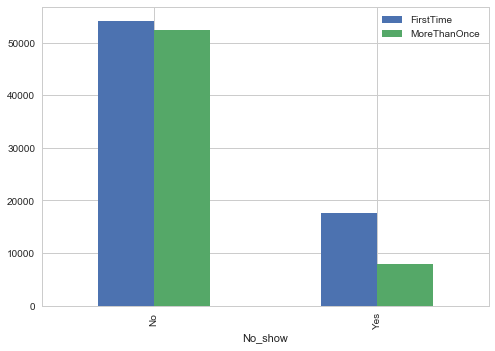

In [797]:
FT.plot(x = 'No_show', kind='bar');

In [798]:
first_time = df.groupby(['AgeStructure', 'No_show'])['PatientID'].nunique()
first_time = pd.DataFrame(first_time)

In [799]:
more_than_once = df.groupby(['AgeStructure', 'No_show']).PatientID.apply(lambda x : x.duplicated(keep=False).sum())
more_than_once = pd.DataFrame(more_than_once)

In [800]:
first_time_or_not = pd.merge(first_time, more_than_once, left_index=True,  right_index=True)
first_time_or_not = first_time_or_not.reset_index().rename(columns = {'PatientID_x':'FirstTime', 'PatientID_y':'MoreThanOnce'})
first_time_or_not['FirstRate'] = first_time_or_not['FirstTime'] / (first_time_or_not['FirstTime'] + first_time_or_not['MoreThanOnce'])*100
first_time_or_not

,AgeStructure,No_show,FirstTime,MoreThanOnce,FirstRate
0,Adult: 30-44,No,10060,10811,48.200853
1,Adult: 30-44,Yes,3641,1791,67.028719
2,Children: 0-14,No,10778,8778,55.113520
3,Children: 0-14,Yes,3617,1624,69.013547
4,Older Adult: 45-59,No,11346,11616,49.412072
5,Older Adult: 45-59,Yes,3309,1398,70.299554
6,Senior: 60-74,No,7490,7277,50.721203
7,Senior: 60-74,Yes,1748,672,72.231405
8,Teenager: 15-29,No,9881,9539,50.880536
9,Teenager: 15-29,Yes,4085,1961,67.565332


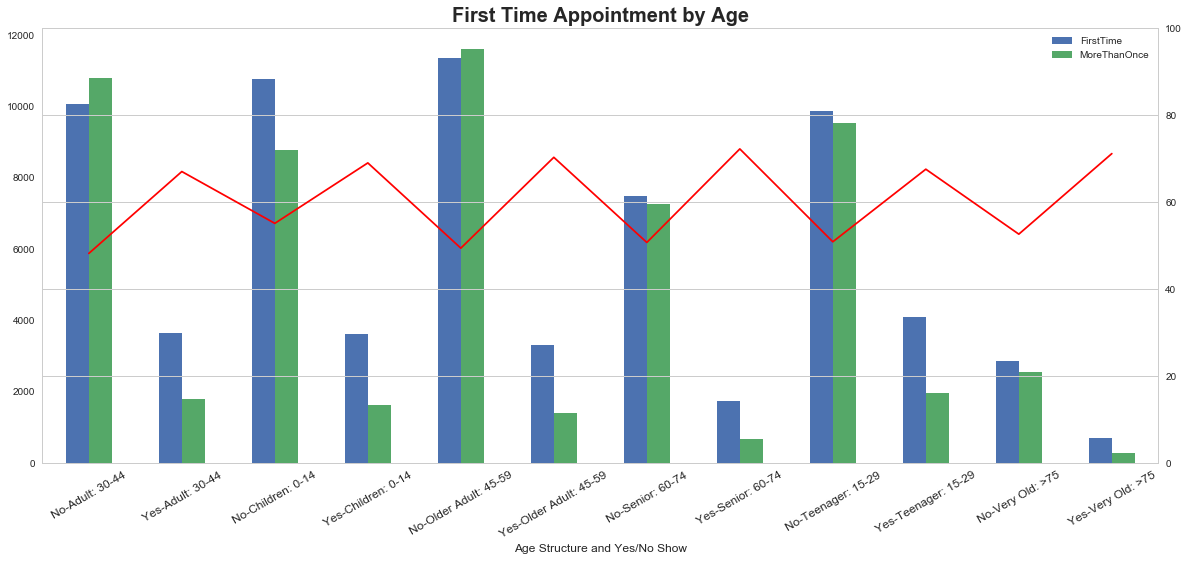

In [801]:
width = .5
labels = ['No-Adult: 30-44','Yes-Adult: 30-44','No-Children: 0-14','Yes-Children: 0-14',
         'No-Older Adult: 45-59','Yes-Older Adult: 45-59','No-Senior: 60-74','Yes-Senior: 60-74',
         'No-Teenager: 15-29','Yes-Teenager: 15-29','No-Very Old: >75','Yes-Very Old: >75']
labels = pd.DataFrame(labels)

ax = first_time_or_not[['AgeStructure', 'FirstTime', 'MoreThanOnce']].plot(x = 'AgeStructure', kind = 'bar', figsize = (20,8))
first_time_or_not['FirstRate'].plot(secondary_y=True, color = 'red')

ax.set_xticklabels(labels[0], rotation = 30, fontsize = 12)
ax.set_xlabel('Age Structure and Yes/No Show', fontsize=12)
plt.xlim([-width, len(first_time_or_not['FirstTime'])-width])
plt.ylim([0, 100])
plt.title('First Time Appointment by Age', fontsize = 20, weight = 'bold');


***Quick Note***

`Generally, 56.3% of people is the first time (named '1st group' here) seeing doctor. The 1st group have higher possibility (87% of tham) to check the appointment after scheduling, while those who came twice or more (named '2nd group') also have high probability to visit doctor. The number of no-showing people at the 1st group are  higher, as opposed to 2nd group, accouned for 1/5 of 1st group. `

`Considering age factor, the younger, the higher first-time and showing rate. 55.1% of children under 14 and 52.6% of senior above 75 who didn show up are the 1st time visiting.`

### Will patients receiving SMS have higher showing rate?

In [802]:
df['SMS_received'].describe()

count    110521.000000
mean          0.321043
std           0.466879
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: SMS_received, dtype: float64

In [803]:
getNoShowlist1(df['SMS_received'])

No_show,SMS_received,No,Yes,No-Showing Rate
0,0,62509,12530,16.697984
1,1,25698,9784,27.574545


In [804]:
getNoShowlist2(df['SMS_received'])

No_show,AgeStructure,SMS_received,No,Yes,No-Showing Rate
0,Adult: 30-44,0,12139,2496,17.055005
1,Adult: 30-44,1,5123,2195,29.994534
2,Children: 0-14,0,11951,2683,18.334017
3,Children: 0-14,1,4369,1925,30.584684
4,Older Adult: 45-59,0,13063,2363,15.318294
5,Older Adult: 45-59,1,5985,1768,22.804076
6,Senior: 60-74,0,8455,1261,12.978592
7,Senior: 60-74,1,3779,875,18.801031
8,Teenager: 15-29,0,11334,2739,19.462801
9,Teenager: 15-29,1,4587,2501,35.284989


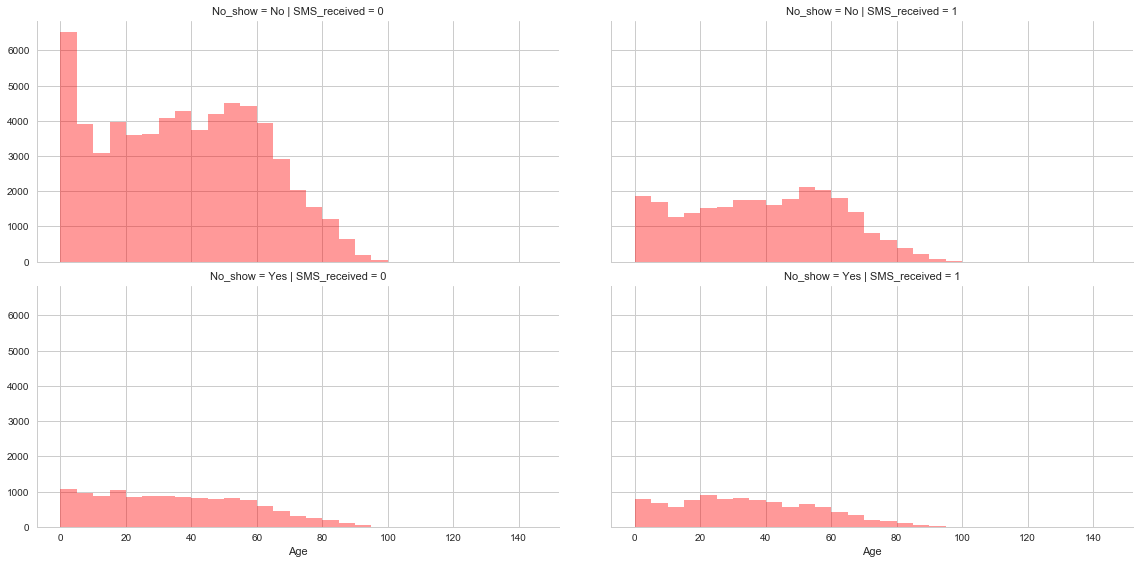

In [805]:
bins = np.arange(0, 150, 5)
grid = sns.FacetGrid(df, col='SMS_received', row = 'No_show', size=4, aspect=2)
grid.map(sns.distplot, 'Age', kde = False, bins = bins, color = 'red').fig.subplots_adjust(wspace=.1, hspace=.1)

***Quick Note***

`Only about 32.1% received SMS reminder before the appointment and among those who got SMS, about 70% of them went to doctor. People who age from 20-60 received more SMS (apparently, the group of ppl have mobile to contact), so higher rate of their showing rate as well. As for those who didn't get SMS, children has higher rate to go, probably brought by their parents who received SMS.`

### Will people supported by scholarship program have higher showing rate?

In [806]:
df['Scholarship'].describe()

count    110521.000000
mean          0.098271
std           0.297682
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Scholarship, dtype: float64

In [807]:
sch = getNoShowlist1(df['Scholarship'])
sch

No_show,Scholarship,No,Yes,No-Showing Rate
0,0,79924,19736,19.803331
1,1,8283,2578,23.736304


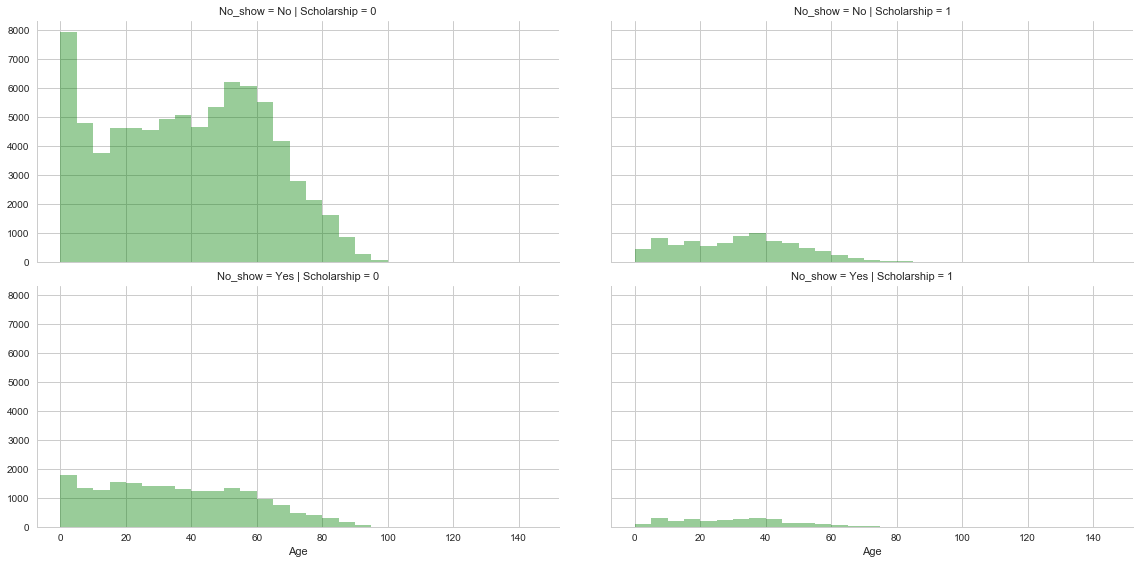

In [808]:
grid = sns.FacetGrid(df, col = 'Scholarship', row = 'No_show',  size=4, aspect=2)
grid.map(sns.distplot, 'Age', kde = False, bins = bins, color = 'green').fig.subplots_adjust(wspace=.1, hspace=.1)

***Quick Note***

`Nearly 10% of people involves in this federal social welfare program and is sponsered for their medical treatment. So, those who have scholarship has higher no-showing rate (23.7%), as opposed to those who don't have.`

### How long do patients wait averagely for the appointment?

In [809]:
df['WaitingDay'].describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: WaitingDay, dtype: float64

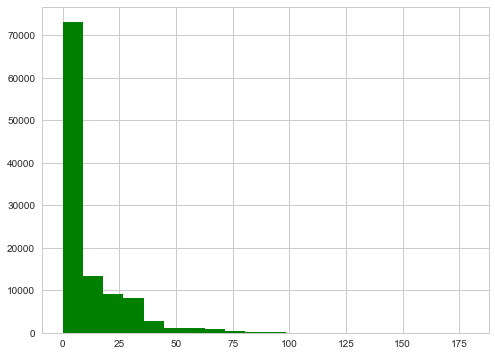

In [810]:
plt.figure(figsize = (8,6))
plt.hist(df['WaitingDay'], color = 'green', bins =20);

***Quick Note***

`People need to wait for 10 days from scheduling to appointment in average and the standard deviation is 15 days.`

In [812]:
wt = getNoShowlist1(df['WaitingDay'])
wt.head()

No_show,WaitingDay,No,Yes,No-Showing Rate
0,0,36770.0,1792.0,4.647062
1,1,4100.0,1113.0,21.350470
2,2,5123.0,1602.0,23.821561
3,3,2093.0,644.0,23.529412
4,4,4059.0,1231.0,23.270321


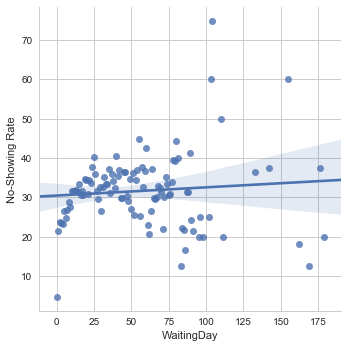

In [814]:
sns.lmplot(x='WaitingDay', y='No-Showing Rate', data = wt, fit_reg = True)

***Quick Note***

`It seems that Waiting Day is not a strong factor for prediction based on the above chart. Yet i'll still analyze further combining with different age segments to see if any finding.`

In [816]:
aw = getNoShowlist1(df['WaitingCategories'])
aw['No'].fillna(0, inplace = True)
aw['Yes'].fillna(0, inplace = True)
aw['No-Showing Rate'].fillna(0, inplace = True)
aw

No_show,WaitingCategories,No,Yes,No-Showing Rate
0,Fortnight: 8-15,9362.0,4166.0,30.795387
1,Month: 16-30,10709.0,5159.0,32.511974
2,Over 1/2 Year: >180,0.0,0.0,0.000000
3,Quarter: 31-90,6792.0,3369.0,33.156185
4,Same day: 0,36770.0,1792.0,4.647062
5,Semester: 91-180,161.0,56.0,25.806452
6,Week: 4-7,13097.0,4413.0,25.202741
7,Within a Week: 1-3,11316.0,3359.0,22.889267


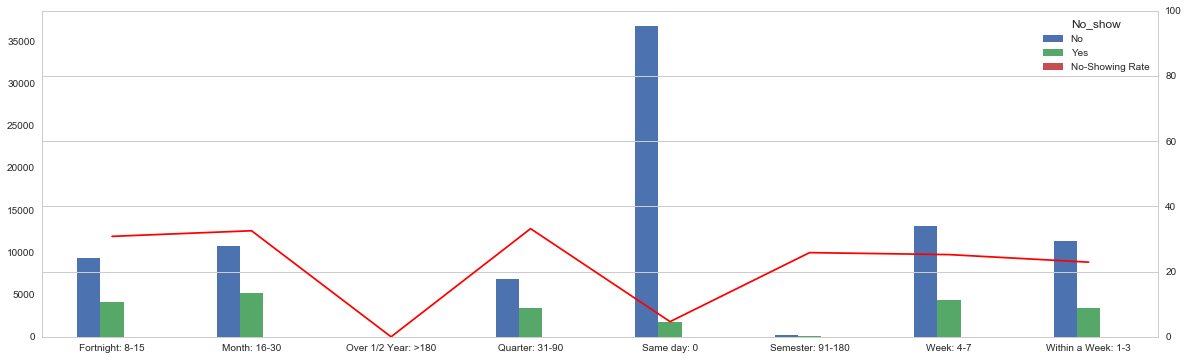

In [817]:
width = .5
ax = aw.plot(kind = 'bar', figsize = (20,6))
ax.set_xticklabels(aw['WaitingCategories'], rotation = 30)
aw['No-Showing Rate'].plot(secondary_y=True, color = 'red')
plt.xlim([-width, len(aw['WaitingCategories'])-width])
plt.ylim([0, 100]);

***Quick Note***

`Most people schduled and made the appointment on the same day. Yet it is found that people with higher showing rate tend to have the appointment on the same day or within a week.`

In [818]:
WaitTime = getNoShowlist2(df['WaitingCategories'])
WaitTime['No'].fillna(0, inplace = True)
WaitTime['Yes'].fillna(0, inplace = True)
WaitTime['No-Showing Rate'].fillna(0, inplace = True)
WaitTime.head()

No_show,AgeStructure,WaitingCategories,No,Yes,No-Showing Rate
0,Adult: 30-44,Fortnight: 8-15,1972.0,916.0,31.717452
1,Adult: 30-44,Month: 16-30,2109.0,1168.0,35.642356
2,Adult: 30-44,Over 1/2 Year: >180,0.0,0.0,0.000000
3,Adult: 30-44,Quarter: 31-90,1233.0,722.0,36.930946
4,Adult: 30-44,Same day: 0,7398.0,263.0,3.432972


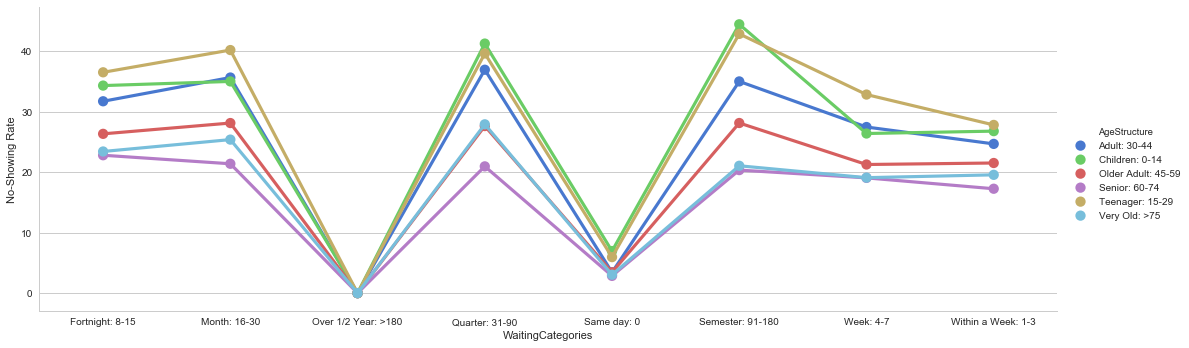

In [820]:
sns.factorplot( 'WaitingCategories', 'No-Showing Rate', hue = 'AgeStructure', data = WaitTime, palette = 'muted', size = 5, aspect = 3);

***Quick Note***

`Taking age into account, children, teenager and adult under 30 have higher no-showing rate after a quarter or even longer. It is likely that the symptoms they have are more emergent.`

### Is any relation between patients' symptoms and showing rate?

In [821]:
patient_df = df[['Gender','AgeStructure','Scholarship','Hipertension','Diabetes',
                    'Alcoholism','Handicap','WaitingCategories','No_show']]

In [822]:
patients = patient_df.groupby(['No_show','AgeStructure']).sum().astype(int)
patients

Scholarship  Hipertension  Diabetes  Alcoholism  \
No_show AgeStructure                                                          
No      Adult: 30-44               2610          2151       627         778   
        Children: 0-14             1950            16        14           9   
        Older Adult: 45-59         1305          6356      2115        1083   
        Senior: 60-74               434          6478      2679         587   
        Teenager: 15-29            1919           265       100         174   
        Very Old: >75                20          2763       978          52   
Yes     Adult: 30-44                810           510       157         204   
        Children: 0-14              607             8         8           8   
        Older Adult: 45-59          338          1418       489         285   
        Senior: 60-74                83          1185       532          94   
        Teenager: 15-29             732            75        46          84   
        Very Old: >75                 1           576       198           2   

                            Handicap  
No_show AgeStructure                  
No      Adult: 30-44             353  
        Children: 0-14           106  
        Older Adult: 45-59       427  
        Senior: 60-74            409  
        Teenager: 15-29          258  
        Very Old: >75            280  
Yes     Adult: 30-44              64  
        Children: 0-14            61  
        Older Adult: 45-59        87  
        Senior: 60-74             70  
        Teenager: 15-29           58  
        Very Old: >75             65

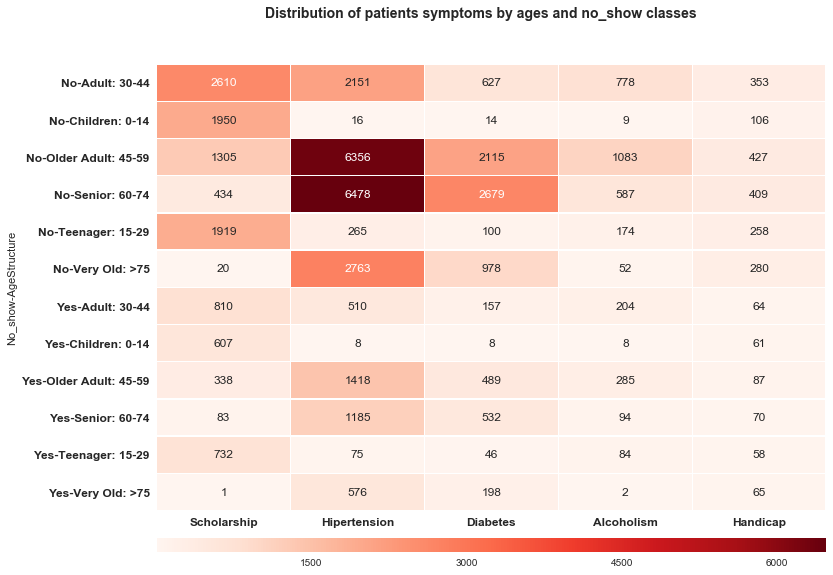

In [823]:
f, ax = plt.subplots(figsize=(12, 10))
f.subplots_adjust(top=.9)
plt.suptitle('Distribution of patients symptoms by ages and no_show classes', fontsize=14, fontweight='bold')

ax.set_yticklabels(ax.get_yticklabels(), ha="right", fontsize=12, weight='bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, weight='bold')

cbar_kws = {'orientation':"horizontal", 'pad':0.05, 'aspect':50}
sns.heatmap(patients, annot=True, fmt='.0f', linewidths=.5, ax=ax, cmap='Reds', cbar_kws=cbar_kws);

***Quick Notes***

`The most senior above 45 went to doctor for Hipertension; the second is Diabetes. Handicapped children are more likely to fail to go to the doctor. It is also more likely for adult from 30-60-year-old with Alcoholism to fail to make the appointment.`

### Which neighbor are patients with higher no-showing rate from?

In [824]:
df['Neighbourhood'].nunique()

81

In [825]:
pd.crosstab(df['AgeStructure'], df['Neighbourhood']).T.style.background_gradient(cmap = 'summer_r')

AgeStructure,Adult: 30-44,Children: 0-14,Older Adult: 45-59,Senior: 60-74,Teenager: 15-29,Very Old: >75
Neighbourhood,,,,,,
AEROPORTO,2,0,4,2,0,0
ANDORINHAS,532,411,424,263,471,94
ANTÔNIO HONÓRIO,36,49,76,28,54,14
ARIOVALDO FAVALESSA,39,74,54,29,60,12
BARRO VERMELHO,86,29,130,70,77,26
BELA VISTA,371,389,387,222,402,63
BENTO FERREIRA,166,89,237,147,143,67
BOA VISTA,58,107,50,37,46,7
BONFIM,651,513,568,284,593,91


In [827]:
neighbors = df.groupby(['Neighbourhood', 'No_show'])
neighbors = neighbors.count()['PatientID'].unstack()
neighbors['No-Showing Rate'] = (neighbors.Yes) / (neighbors.Yes + (neighbors.No))*100
neighbors['Total'] = 100 
neighbors = neighbors.reset_index()
neighbors.head()

No_show,Neighbourhood,No,Yes,No-Showing Rate,Total
0,AEROPORTO,7.0,1.0,12.500000,100
1,ANDORINHAS,1741.0,521.0,23.032714,100
2,ANTÔNIO HONÓRIO,221.0,50.0,18.450185,100
3,ARIOVALDO FAVALESSA,220.0,62.0,21.985816,100
4,BARRO VERMELHO,332.0,91.0,21.513002,100


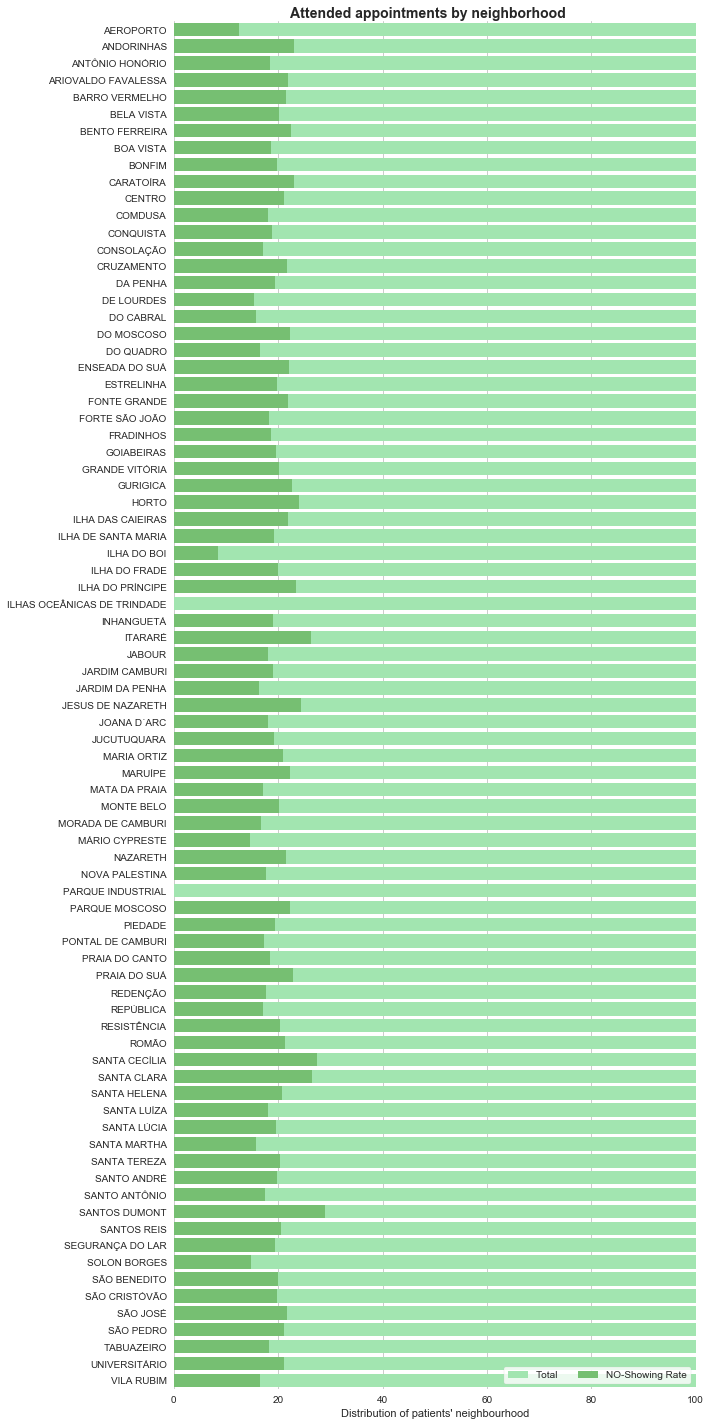

In [828]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 20), sharey=False)
f.tight_layout() 
f.subplots_adjust(top = .97) 

sns.set_color_codes("pastel")
sns.barplot(x="Total", y="Neighbourhood", data=neighbors,
            label="Total", color="g")

sns.set_color_codes("muted")
sns.barplot(x="No-Showing Rate", y="Neighbourhood", data=neighbors,
            label="NO-Showing Rate", color="g")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100), ylabel="",
       xlabel="Distribution of patients' neighbourhood")
sns.despine(left=True, bottom=True, ax = ax)


plt.suptitle('Attended appointments by neighborhood', fontsize=14, fontweight='bold')

***Quick Note***

`Except for ILHAS OCEÂNICAS DE TRINDADE and PARQUE INDUSTRIAL, it apppears that SANTOS DUMONT has higher no-showing rate possibly because of more children there. ILHA DO BOI has highest showing rate, but there are only a few residents in this area, causing the higher showing rate. So, it is still needed to take absolute number of residents in each neighbourhood into account for more precise analysis.`

<a id='conclusions'></a>
## Conclusions

`In conclusion, according to the plots and quick notes in each section, first of all, children and the senior have higher probability to see the doctor. They went to the doctor within a shorter period, better on the same day, possibly due to their emergency of symptoms, such as Hipertension for elders and handicap for children. `

`Second, those who received SMS reminder have higher showing rate. It means that the SMS did work for reminding people to go, especially for those who scheduled for long time ago. (It could be told by analyzing the classes of SMS receiver and WaitingDay data.) `

`Third, those who are supported by the social welfare program and have scholarship (most of them are children and 30-44-year-old people), has higher no-showing rate. It needs further analysis to know why they did not show up, probably because of the type of disease they have or the awaiting time that takes too long for the appointment. `

`In terms of waiting days, the shorter time people wait, the higher probability they would go to the doctor. Most people needed to see doctor on the same day. So for prediction, it is better to segment more specific hours for a day to analyze more patients' behaviors on the same day. Also, it is better to even split awaiting time by Monday, Tuesday, and so forth, to analyze no-showing reasons by day.`

`In my opinion, Age, WaitingDay(need new segmentation), four kinds of Symptoms, will be a strong factors for further predicton.`



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [830]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255